# Graph Theory and NetworkX - Part 3: Importance and Network Centrality

In this post, we will be looking at the question of how important an edge or a node is. This is called **network centrality**.

Now what does important mean in this context? Importance can mean different things in different situations. If we think of a social network, we could imagine that the number of friends a person has, i.e. the degree of the node could be important. This is described by the **degree centrality**. This could also be important for situations where we want to prevent the spread of let's say a disease in a network. In contrast, if we come back to the example of building a delivery center, it might be important that you can reach every other node in the network as quickly as possible. This is measured by the **closeness centrality**. If you spend every morning at the same street junction (node) swearing about having -again- taken the same route like everyone else, and now all of you are standing in the same traffic jam, you are more than familiar with **betweenness centrality**, a centrality bases on the notion of part of how many (shortest/total) paths a node is. The same concept can be applied to edges (streets) leading to the **edge betweenness centrality**. Finally the **eigenvector centrality** is based on the concept that nodes which are connected to higher scoring nodes should have higher scores themselves. Google's **page rank** and the **Katz centrality** are both variants of the eigenvector centrality.

Note that if you want to know more about the different measures of centrality, the help() function often provides links to further literature.

We will be demonstrating the first centrality measure - the degree centrality - using the graph below. All further centrality measures work in exactly the same way, which is why I will not show any sample code, but just give the name of the networkX functions.

In [1]:
# Load modules
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

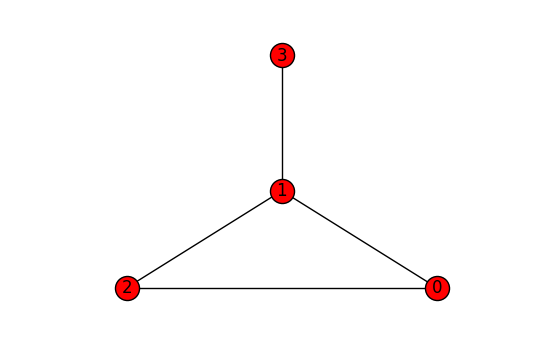

In [2]:
# Create and plot graph G
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (1,2), (1,3)])
pos = {2:(-1, 0), 0:(1,0), 1:(0, 0.5), 3:(0,1.2)}
plt.axis('off')
nx.draw_networkx(G, pos)

### Degree centrality

Degree centrality measures importance by counting the number of edges which are connected to a node - the **degree**. The function *degree()* returns a dictionary of node names and their degrees.

In [3]:
nx.degree(G)

DegreeView({0: 2, 1: 3, 2: 2, 3: 1})

In a directed graph, one can distinguish between the **in-degree** counting the number of in-nodes and the **out-degree** counting ... well ...

However, while the degree is well suited to compare different nodes within a network, it is not suited to compare different networks since with the number of nodes in a network, also the possible number of edges grows. Therefore we need to normalize, leading us to the **degree centrality**, which is defined as the number of edges normalized by the number of nodes in the network minus one:

${ c_D(s) = \frac{d(s)}{n-1}}$

with $d(s)$ being the degree of node $s$ and $n$ the number of nodes in the network.

The function `degree_centrality()` returns a dictionary of nodes with their degree centralities:

In [4]:
nx.degree_centrality(G)

{0: 0.6666666666666666, 1: 1.0, 2: 0.6666666666666666, 3: 0.3333333333333333}

The corresponding functions for directed graphs are `in_degree_centrality()` and `out_degree_centrality()`. Note, that the functions `degree()` and `degree_centrality()` can be applied to directed graphs and return the values of the undirected version.

In [5]:
G_d = nx.DiGraph()
G_d.add_edges_from([(1,2), (1,3)])

print(nx.degree_centrality(G_d))
print(nx.in_degree_centrality(G_d))
print(nx.out_degree_centrality(G_d))

{1: 1.0, 2: 0.5, 3: 0.5}
{1: 0.0, 2: 0.5, 3: 0.5}
{1: 1.0, 2: 0.0, 3: 0.0}


## Closeness centrality

The [**closeness centrality**](https://en.wikipedia.org/wiki/Closeness_centrality) of a node gives us a measure of how quickly one can get from this node to all other nodes (remember the example of the distribution center). The closeness centrality is defined as the inverse of the sum of shortest paths from this node to all others, normalized by the number of total nodes in the network minus one:

$c_C(s) = \frac{n - 1}{\sum_{t\in G} p(s, t)}$

with $p(s,t)$ being the shortest path between nodes $s$ and $t$ and $n$ being the number of nodes in the network.  The shorter the connections to all nodes are, the larger is the closeness centrality.

Note, that while normalization of the closeness centrality is straight forward for completely connected networks, several scenarios are possible for unconnected graphs. One might want to normalize using the total number of nodes in the network or alternatively only the number of nodes in the connected subgraph. NetworkX offers solutions to both situations by allowing us to set the `normalized` parameter. `normalized = True` (default) normalizes by the number of nodes in the subgraph, `normalized=False` normalizes by using the total number of nodes in the graph.

The function in networkX is called `closeness_centrality()`. 

Note that the closeness centrality of a node, which cannot reach any other node is zero by definition.

## Betweenness and Newman's Betweenness (Load) Centrality

Another way of thinking about importance is to say that what makes a node important is being included in many shortest paths between other nodes. This is the basis of the [**betweenness centrality**](https://en.wikipedia.org/wiki/Betweenness_centrality), which was firstly formalized by Freeman [here](https://www.jstor.org/stable/3033543?origin=crossref&seq=1#page_scan_tab_contents). The betweenness centrality could be a good centrality measure for traffic junctions for example or for determining who to talk to in a social network if you need to get in contact with somebody specific. The betweenness centrality is defined as

 $c_B(v) =\sum_{s,t \in G} \frac{p(s, t|v)}{p(s, t)}$
    
with $G$ being the graph, $p(s, t)$ the number of shortest paths between nodes $s$ and $t$ and $p(s, t|v)$ the number of those paths  passing through the node $v$. The betweenness centrality is included in networkX as `betweenness_centrality()`.

A variant of the betweenness centrality is **Newman's betweenness centrality**. Whilst the standard betweenness centrality takes into account only shortest paths, Newman's betweenness centrality takes into account all paths via a random walk method with weights assigned according to the path lenghts. Whilst published in 2005 in Elsevier, the publication presenting the metric can also be found on the archive [here](https://arxiv.org/abs/cond-mat/0309045). It is implemented in networkX as `load_centrality()`.

## Eigenvector Centrality

Whilst most of the metrics above take into account only the immediate properties of a node, the [**eigenvector centrality**](https://en.wikipedia.org/wiki/Eigenvector_centrality) takes into account the properties of its neighbours by assuming that connections to more important nodes should be more important. Mathematically, the eigenvector centrality is obtained by calculating the eigenvectors of the adjacency matrix A by solving the eigenvector equation 

$Ax = \lambda x$.

The eigenvector with the largest eigenvalue $\lambda$ gives the relative centrality scores for the nodes in the network. In networkX use the function `eigenvector_centrality()` to obtain this centrality score.

## Page Rank
The [**page rank**](https://en.wikipedia.org/wiki/PageRank) (referring both to the web page and to Larry Page, one of the founders of Google) is a variant of the eigenvector centrality in the sense that the centrality score of a node depends on the centrality scores of the connected nodes. It is used by Google to rank the websites in their search engine results (it is not the only one that is used, but it was the first and is the best known). The page rank of a page is higher if it receives many links from pages with a high page rank themselves. A detailed explanation would lead to far for this post, but if you are interested, take a look [here](https://en.wikipedia.org/wiki/PageRank). The page rank in networkX is computed by the function `pagerank()`. 

## Katz centrality
Another centrality measure related to the eigenvector centrality is the [**Katz centrality**](https://en.wikipedia.org/wiki/Katz_centrality) (introduced 1953 by Leo Katz). When assessing connectivity, it not only takes into account the shortest paths, but results as the sum over all paths between a pair of nodes, where paths are weighted by a factor $\alpha^n$ with $b$ being the path length. It is implemented in networkX as `katz_centrality()`.

## Summary

In this post, we have seen a short overview over some of the most commonly used centrality measures. Note that neither list nor explanations are meant to be complete - many more variants are out there. Moreover, it is meant to provide a summary and might serve as a starting point for further research. One final comment: With all these measaures, one would not expect the scores to independent of each other and indeed some are strongly correlated. An example of an article detailing some of these correlations can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2875682/). 

This will for the moment be the final post in the Introduction to Graph Theory and NetworkX series. I might add further posts in the future. For the moment being, it is time to return to where my journey into graph theory began, which is the question, if the changes of the board between [Pandemic and Pandemic Legacy](https://www.zmangames.com/en/games/pandemic/) fixed the felt inequilibrium between the distructive power of the yellow virus vs the other coloured viruses (and if the felt inequilibrium can indeed be quantified).

I will let you know and I hope you enjoyed reading as much as I enjoyed the writing (and learning)!